In [1]:
from cobra.io import read_sbml_model
from utils import model_validation as mv

iJL432 = read_sbml_model('GEMs/iJL432.xml')
iCAC802 = read_sbml_model('GEMs/iCAC802.xml')

Model does not contain SBML fbc package information.
'' is not a valid SBML 'SId'.
SBML package 'layout' not supported by cobrapy, information is not parsed
SBML package 'render' not supported by cobrapy, information is not parsed
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_R0001 "ala-L + glx <==> pyr + gly">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_R0001 "ala-L + glx <==> pyr + gly">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_R0002 "pyr + ser-L <==> ala-L + hpyr">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_R0002 "pyr + ser-L <==> ala-L + hpyr">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_R0004 "nad + 3pg <==> nadh + (1) h + 3php">
Use of GENE ASSOCIATION or

In [14]:
nj4 = read_sbml_model('GEMs/NJ4_curated.xml')

# iCAC802 model

namespace is not easy to navigate - but there is a corresponding excel doc. that can be used for some automated translation

In [21]:
iCAC802

Name,
Memory address,124f75000
Number of metabolites,1253
Number of reactions,1462
Number of genes,804
Number of groups,0
Objective expression,1.0*Biomass - 1.0*Biomass_reverse_57a34
Compartments,"Cytoplasm, Extracellular"


iCAC802 actually has more metabolites and reactions than my nj4 model

In [7]:
prod_rx = [
    'Ex_113', #butanol
    'Ex_96', #butyrate
    'Ex_110', #acetone
    'Ex_111', #ethanol
    'Ex_104', #acetate
]

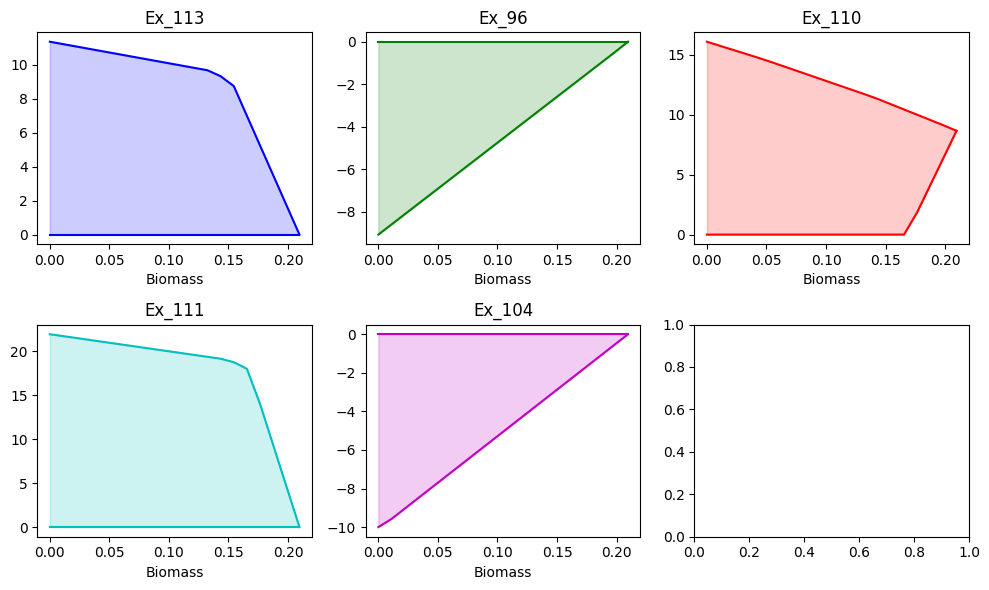

In [9]:
from utils import static_sim

static_sim.plot_flux_envelopes(iCAC802, reactions=prod_rx, BM_func='Biomass')

- at fist glance it looks like but/ac is growth coupled - but actually it looks as though it is just possible for the model to take them up? This seems to be describing the solventogenic phase (as acetone production is growth-coupled) 
- idea: look at acetone, butyrate uptake and growth at the same time!

In [17]:
import straindesign as sd
import matplotlib.pyplot as plt

_,_,plot = sd.plot_flux_space(iCAC802,('-Ex_96','Ex_110','Biomass'),points=10, show=False);
plot._axes.view_init(elev=20, azim=130)
plt.show()

ValueError: cannot convert float NaN to integer

# iJL432

namespace is difficult + there is only a pdf that does not lend to id / name translation

In [2]:
products = ['BUOH', 'BU', 'ACETONE', 'AC', 'ETOH']
prod_reactions = [str('EX_'+prod+'_Ext_') for prod in products]
# uptake rx: EX_DXYL_Ext_

Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.
Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.
Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.
Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.
Could not identify an external compartment by name and choosing one with the mos

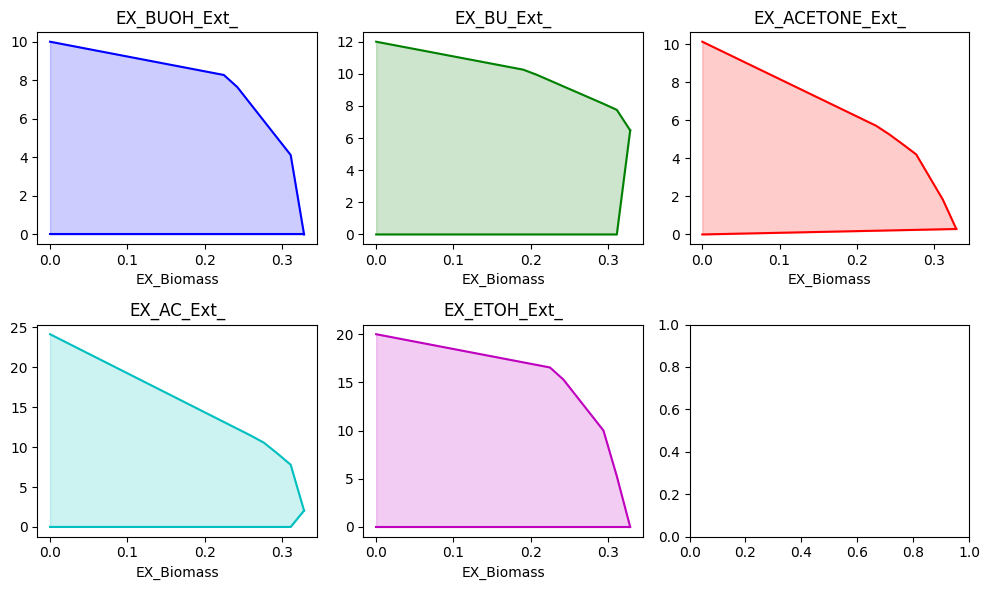

In [4]:
from utils import static_sim

static_sim.plot_flux_envelopes(iJL432, reactions=prod_reactions, BM_func='EX_Biomass')

In [10]:
iJL432.reactions.EX_ETOH_Ext_

Reaction identifier,EX_ETOH_Ext_
Name,EX_ETOH_Ext_
Memory address,0x127621f60
Stoichiometry,ETOH_Ext__Cell <=> ETOH_Ext_ <=>
GPR,
Lower bound,-1000.0
Upper bound,1000.0


In [3]:
iJL432.reactions.EX_Biomass

Reaction identifier,EX_Biomass
Name,EX_Biomass
Memory address,0x12cc47a00
Stoichiometry,BIOMASS_Cell --> BIOMASS -->
GPR,
Lower bound,0.0
Upper bound,1000.0


In [16]:
iJL432.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
GLC_Ext__Cell,EX_GLC_Ext_,10,0,0.00%
NH3_Ext__Cell,EX_NH3_Ext_,2.585,0,0.00%
PABA_Ext__Cell,EX_PABA_Ext_,0.005213,0,0.00%
Pi_Ext__Cell,EX_Pi_Ext_,0.2976,0,0.00%
SO4_Ext__Cell,EX_SO4_Ext_,0.3571,0,0.00%
Metabolite,Reaction,Flux,C-Number,C-Flux
ACETONE_Ext__Cell,EX_ACETONE_Ext_,-0.287,0,0.00%
AC_Ext__Cell,EX_AC_Ext_,-2.05,0,0.00%
BU_Ext__Cell,EX_BU_Ext_,-6.48,0,0.00%
BIOMASS_Cell,EX_Biomass,-0.3287,0,0.00%


In [87]:
essential_rxns = ['EX_PABA_Ext_', 'EX_SO4_Ext_', 'EX_NH3_Ext_', 'EX_Pi_Ext_', 'EX_DXYL_Ext_', 'EX_GLC_Ext_']

medium = {rx:0 for rx in iJL432.medium.keys()}

for rx in essential_rxns:
    medium[rx] = 10

Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.


In [88]:
with iJL432 as model:
    iJL432.medium = medium
    sol = iJL432.optimize()

Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.


In [89]:
sol

,fluxes,reduced_costs
GLCpts,10.000000,0.065748
FRUpts,0.000000,0.065748
MNLpts,0.000000,0.059173
MANpts,0.000000,0.065748
LACTpts,0.000000,0.131496
...,...,...
EX_LSER_Ext_,0.000000,0.000000
EX_PYR_Ext_,0.000000,0.000000
EX_DXYL_Ext_,-0.000000,0.000000
EX_LTHR_Ext_,0.000000,0.000000


In [7]:
# set medium to be xylose minimal medium
# TODO

In [21]:
iJL432.reactions.rBIOMASS.metabolites

{<Metabolite ATP_Cell at 0x12098ca90>: -40.0,
 <Metabolite CARBO_Cell at 0x12098d3c0>: -0.0432,
 <Metabolite DNA_Cell at 0x12098f460>: -0.026,
 <Metabolite PEPTIDO_Cell at 0x120949e70>: -0.1009,
 <Metabolite PLIPID_Cell at 0x12098d5a0>: -0.076,
 <Metabolite PROTEIN_Cell at 0x12098f1f0>: -0.5284,
 <Metabolite RNA_Cell at 0x12094bb50>: -0.0655,
 <Metabolite TEICH_Cell at 0x12094bc70>: -0.08,
 <Metabolite TRACE_Cell at 0x12094b820>: -0.0494,
 <Metabolite ADP_Cell at 0x12098c280>: 40.0,
 <Metabolite BIOMASS_Cell at 0x12098d840>: 1.0,
 <Metabolite Pi_Cell at 0x12098c460>: 40.0}

# compare to my NJ4 model

Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.
Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.
Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.
Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.
Could not identify an external compartment by name and choosing one with the mos

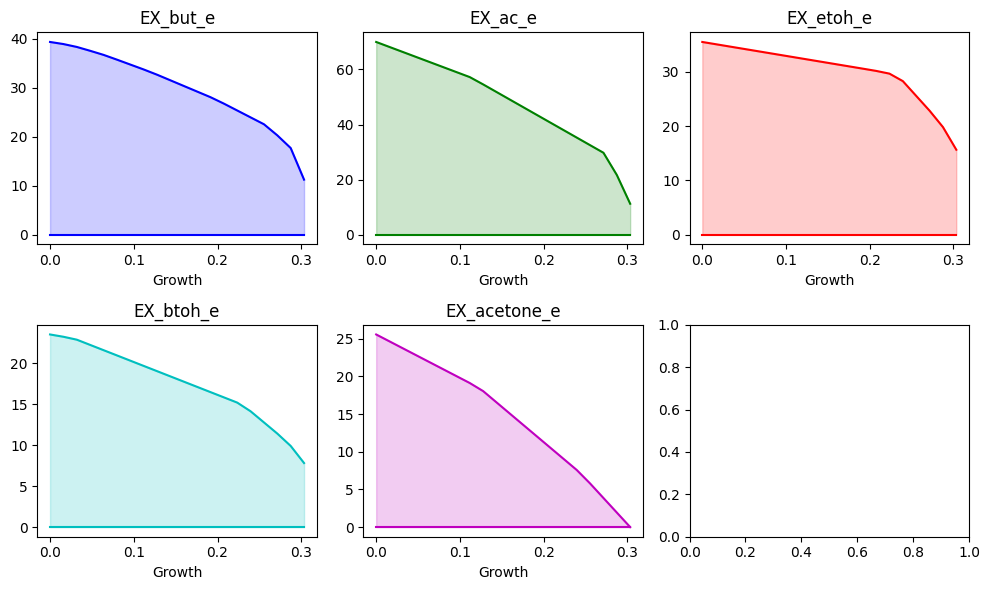

In [15]:
from utils import static_sim

prod_reactions = ["EX_but_e", "EX_ac_e", "EX_etoh_e", "EX_btoh_e", "EX_acetone_e"]

static_sim.plot_flux_envelopes(nj4, reactions=prod_reactions)

# Thermosaccralyticum model

In [1]:
from cobra.io import read_sbml_model
import pandas as pd

excel_model = pd.read_excel("GEMS/thermoanaerobe_sacc_2015.xls")

In [14]:
from utils import read_excel

thermo_model = read_excel.read_excel("GEMS/12918_2015_159_MOESM7_ESM.xls",
                          rxn_sheet_name="reactions",
                          rxn_id_key="Rxn name",
                          rxn_name_key="Rxn description",
                          rxn_str_key="Formula",
                          rxn_gpr_key="Gene-reaction association",
                          rxn_lb_key="LB",
                          rxn_ub_key="UB",
                          rxn_fwd_arrow="->",
                          rxn_rev_arrow="<-",
                          rxn_reversible_arrow="<=>",
                          met_sheet_name="metabolites",
                          met_id_key="Metabolite name",
                          met_name_key="Metabolite description",
                          met_formula_key="Metabolite charged formula",)

unknown metabolite 'fdox' created


In [16]:
thermo_model.objective = thermo_model.reactions.biomass_target

In [17]:
thermo_model.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
ca2[c],EXCH_ca2_c,0.01381,0,0.00%
coa[c],EXCH_coa_c,0.1533,21,0.41%
fe3[e],EXCH_fe3(e),0.01467,0,0.00%
glc-D[e],EXCH_glc-D(e),131,6,99.59%
h2s[e],EXCH_h2s(e),0.6427,0,0.00%
k[c],EXCH_k_c,3.048,0,0.00%
mg2[e],EXCH_mg2(e),0.4389,0,0.00%
nh4[e],EXCH_nh4(e),41.78,0,0.00%
pi[c],EXCH_pi_c,10.08,0,0.00%
Metabolite,Reaction,Flux,C-Number,C-Flux
